In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.stats

* [El problema](#el-problema)
    * [¿Como cuantificamos el problema?](#cuantificar)
* [Enfoque bayesiano](#enfoque-bayesiano)
* [Enfoque frecuentista](#enfoque-frecuentista)
* [Apéndice](#apendice)
    * [Bayes: escoger priors](#priors)
    * [Bayes: conveniencia de representar las conclusiones como distribuciones probabilísticas](#bayes-convenience)
    * [Frecuentistas: escoger nivel de confianza](#confidence-level)
* [Ejercicio: ratio de conversión en una web](#ejercicio)
    * [Ejercicio 1](#ejercicio1)
    * [Ejercicio 2](#ejercicio2)
    * [Ejercicio 3](#ejercicio3)
    * [Ejercicio 4](#ejercicio4)

<span id='el-problema'></id>
### El problema

Son las elecciones entre el [partido de los Buffs y el partido de los Blues](https://en.wikipedia.org/wiki/The_Pickwick_Papers).

En nuestro sistema electoral todos los ciudadanos están forzados a:
* votar a uno de los dos partidos, no hay abstenciones bajo pena de muerte
* contestar honestamente a las encuestas telefónicas bajo pena de muerte

esta legislación, blindada a nivel constitucional, fue aprobada por una junta militar de estadísticos para simplificar su labor después de la transición.

Vamos a suponer 3 escenarios:

1. En el primer escenario no llevamos a cabo ninguna encuesta telefónica
2. En el segundo escenario llevamos a cabo una encuesta telefónica de 7 llamadas y obtenemos resultados:
    * 3 votos a los Buffs
    * 4 votos a los Blues
3. En el tercer escenario llevamos a cabo una encuesta telefónica de 21 llamadas y obtenemos resultados:
    * 9 votos a los Buffs
    * 12 votos a los Blues
    
¿Qué conclusiones podemos sacar acerca de los posibles resultados electorales?

<span id='cuantificar'></id>
#### ¿Como cuantificamos el problema?

Esto es un problema de [estimación de proporción](https://en.wikipedia.org/wiki/Binomial_distribution): sabemos que hay una proporción de la población $p$ que votará a los Buffs, y queremos, mediante experimentos, sacar información acerca de esta proporción.

Esta proporción $p = \frac{porcentaje\_votos\_buffs}{100}$ es un valor entre 0 y 1.

Las cosas que podemos decir acerca de esta proporción $p$ dependerán del enfoque que usemos para formular el problema.

<span id='enfoque-bayesiano'></id>
### Enfoque bayesiano

El [enfoque bayesiano](https://en.wikipedia.org/wiki/Bayesian_statistics) nos permite cuantificar nuestras opiniones acerca de $p$ como una distribución probabilística donde a cada valor posible de $p$ le asignamos una probabilidad, y esto es lo que sabemos acerca de $p$.

**En el enfoque bayesiano, nuestra incertidumbre acerca de $p$ viene representada por una distribución probabilística sobre $p$**.

**Cuando obtenemos datos empíricos relevantes a $p$ (por ejemplo, los resultados de una encuesta) los usamos para [actualizar la distribución probabilística que describe nuestra opinión de $p$](https://en.wikipedia.org/wiki/Bayesian_inference)**.

Por ejemplo, vamos a visualizar los siguientes casos:
* Pepe está bastante seguro de una victoria de los Buffs: ve muy probables resultados electorales donde los Buffs se llevan más del 60% de los votos, y muy improbables resultados donde los buffs se llevan menos del 40% de los votos. Ha escogido una [distribución Beta](https://en.wikipedia.org/wiki/Beta_distribution) con $\alpha=9$ y $\beta=2$ para cuantificar sus creencias
* María también cree que una victoria de los Buffs es probable, pero está bastante menos segura y no ve inconcebible una victoria aplastante de los Blues. Ha escogido una [distribución Beta](https://en.wikipedia.org/wiki/Beta_distribution) con $\alpha=3$ y $\beta=1$ para cuantificar sus creencias
* Vladimir Vladimirovich controla las máquinas de votación y ha amañado las elecciones: sabe con certeza que las ganarán los Blues con entre el 60% y el 80% de los votos. Ha escogido una [función escalon](https://en.wikipedia.org/wiki/Step_function) para cuantificar sus creencias.



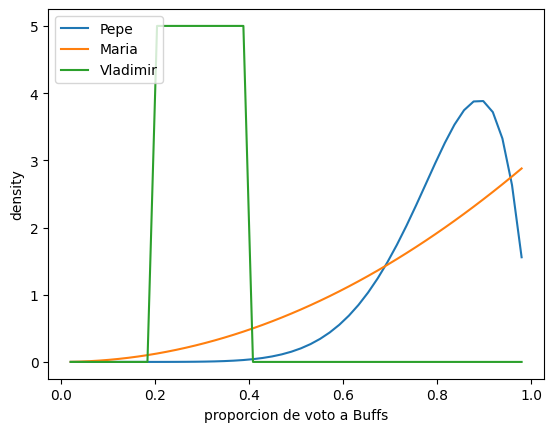

In [2]:
f, ax = plt.subplots(1)

xs = np.linspace(0, 1)[1:-1]
ys_pepe = scipy.stats.beta.pdf(xs, 9, 2)
ys_maria = scipy.stats.beta.pdf(xs, 3, 1)

def vova_density(x):
    res = (0.2 < x) *  (x <= 0.4)
    return res.astype(float) * 5
    
ys_vova = vova_density(xs)

ax.set_ylabel('density')
ax.set_xlabel('proporcion de voto a Buffs')

ax.plot(xs, ys_pepe, label="Pepe")
ax.plot(xs, ys_maria, label="Maria")
ax.plot(xs, ys_vova, label="Vladimir")

plt.legend(loc="upper left")

plt.show()

Si obtenemos datos empíricos, eg. los resultados de una encuesta telefónica donde 9 votarían a los buffs y 12 no, [podemos usar Bayes para actualizar nuestras creencias teniendo en cuenta estos datos](https://en.wikipedia.org/wiki/Binomial_distribution#Beta_distribution):

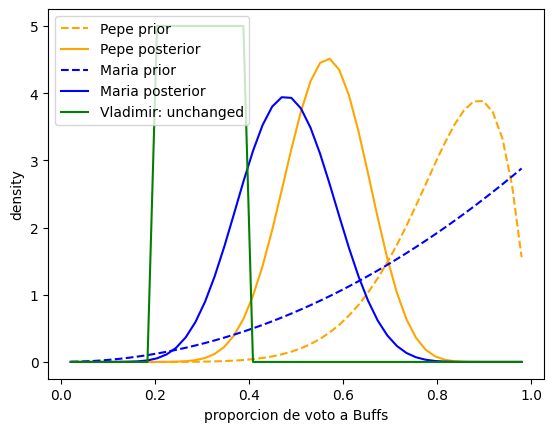

In [3]:
f, ax = plt.subplots(1)

xs = np.linspace(0, 1)[1:-1]
prior_pepe = scipy.stats.beta.pdf(xs, 9, 2)
prior_maria = scipy.stats.beta.pdf(xs, 3, 1)

posterior_pepe = scipy.stats.beta.pdf(xs, 9 + 9, 2 + 12)
posterior_maria = scipy.stats.beta.pdf(xs, 3 + 9, 1 + 12)

def vova_density(x):
    res = (0.2 < x) *  (x <= 0.4)
    return res.astype(float) * 5
    
ys_vova = vova_density(xs)

ax.set_ylabel('density')
ax.set_xlabel('proporcion de voto a Buffs')

ax.plot(xs, prior_pepe, label="Pepe prior", color="orange", linestyle="--")
ax.plot(xs, posterior_pepe, label="Pepe posterior", color="orange")

ax.plot(xs, prior_maria, label="Maria prior", color="blue", linestyle="--")
ax.plot(xs, posterior_maria, label="Maria posterior", color="blue")

ax.plot(xs, ys_vova, label="Vladimir: unchanged", color="green")

plt.legend(loc="upper left")

plt.show()

Después de ver los datos de la encuesta María y Pepe han cambiado sus opiniones; no coinciden del todo pero están bastante más cerca que al principio.

Vladimir no ha cambiado de opinión: ha amañado el resultado y sabe que la intención de voto es irrelevante al resultado electoral.

Si nosotros queremos aplicar el enfoque necesitamos una [opinión inicial, o *prior*](https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors), acerca de la distribución de $p$: cómo encontrar esta distribución inicial es el aspecto más controvertido del enfoque bayesiano.

Una forma de escoger este prior es razonando con el [principio de indiferencia de Laplace](https://en.wikipedia.org/wiki/Principle_of_indifference): podemos representar nuestra ignorancia con una distribución que asigne igual probabilidad a cualquier proporción, si dibujamos esta distribución aparece como una recta horizontal.

Vamos a dibujar:

1. la distribución prior
2. la distribución posterior que resulta de actualizar el prior con los datos experimentales de la encuesta con resultados 3,4
3. la distribución posterior que resulta de actualizar el prior con los datos experimentales de la encuesta con resultados 9,12

In [4]:
xs = np.linspace(0, 1)[1:-1]

a1 = 3
b1 = 4

a2 = a1 * 3
b2 = b1 * 3

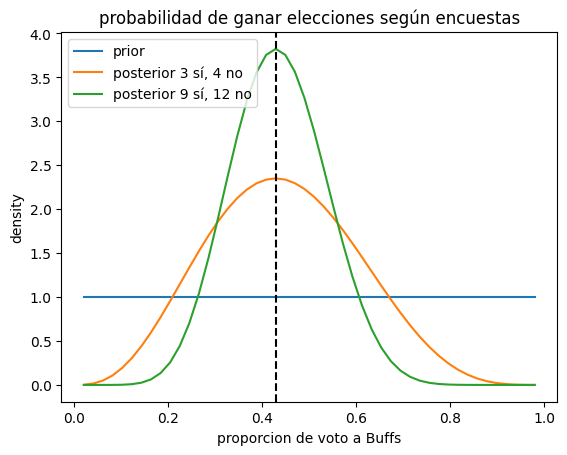

In [5]:
ys_0 = scipy.stats.beta.pdf(xs, 1, 1)
ys_1 = scipy.stats.beta.pdf(xs, 1 + a1, 1 + b1)
ys_2 = scipy.stats.beta.pdf(xs, 1 + a2, 1 + b2)


f, ax = plt.subplots(1)

ax.plot(xs, ys_0, label="prior")
ax.plot(xs, ys_1, label="posterior {0} sí, {1} no".format(a1, b1))
ax.plot(xs, ys_2, label="posterior {0} sí, {1} no".format(a2, b2))

ax.set_title("probabilidad de ganar elecciones según encuestas")
ax.set_ylabel('density')
ax.set_xlabel('proporcion de voto a Buffs')

plt.axvline(x=3/(3 + 4), color='black', linestyle='--')

plt.legend(loc="upper left")
plt.show()

TODO: Interpretación

<span id='enfoque-frecuentista'></id>
### Enfoque frecuentista

El punto de vista frecuentista difiere del bayesiano en que no podemos hablar de la distribución de $p$: $p$ es un parámetro fijo y desconocido.

**Así que tendremos que inventarnos otros mecanismos para cuantificar la incertidumbre que tenemos acerca de $p$**: en este caso el mecanismo que suelen usar los frecuentistas es el [intervalo de confianza](https://en.wikipedia.org/wiki/Confidence_interval).

[El intervalo de confianza no significa lo que la mayoría de gente cree que significa](https://en.wikipedia.org/wiki/Confidence_interval#Common_misunderstandings). Cuidado.

In [6]:
def wald(successes, failures, confidence):
    """
    Wald approximation to binomial proportion confidence interval
    see https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    
    Parameters
    ----------
    successes : int
        successes in binomial experiment
    failures : int
        failures in binomial experiment
    confidence : float
        desired confidence level between 0 and 1, eg. 0.95
    
    Returns
    -------
    a : float
        left side of confidence interval
    b : float
        right side of confidence interval
    
    """
    n = successes + failures
    p = successes / n
    alpha = 1 - confidence
    
    quantile = 1 - (alpha / 2)
    z = scipy.stats.norm.ppf(quantile)
    delta = z * np.sqrt(p * (1-p) / n)
    return p - delta, p + delta
    

In [7]:
wald_3_4 = wald(3, 4, 0.95)

In [8]:
wald_9_12 = wald(9, 12, 0.95)

Podemos pintar los intervalos de confianza del percentil 95% como áreas sombreadas al lado de la respuesta bayesiana para contrastar los enfoques:

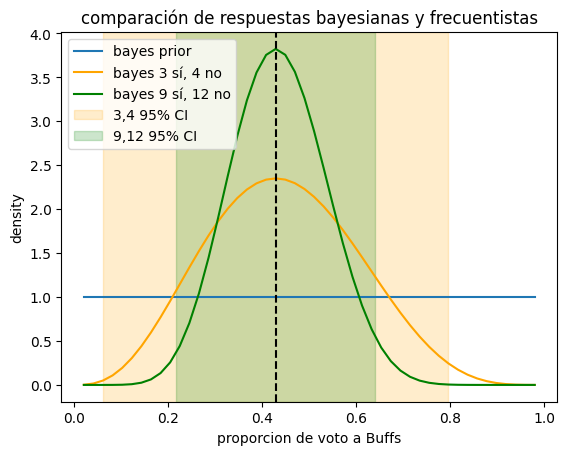

In [9]:
f, ax = plt.subplots(1)

ax.plot(xs, ys_0, label="bayes prior")
ax.plot(xs, ys_1, label="bayes {0} sí, {1} no".format(a1, b1), color="orange")
ax.plot(xs, ys_2, label="bayes {0} sí, {1} no".format(a2, b2), color='green')

ax.set_title("comparación de respuestas bayesianas y frecuentistas")
ax.set_ylabel('density')
ax.set_xlabel('proporcion de voto a Buffs')

plt.axvline(x=3/(3 + 4), color='black', linestyle='--')

ax.axvspan(wald_3_4[0], wald_3_4[1], label='3,4 95% CI', alpha=0.2, color='orange')
ax.axvspan(wald_9_12[0], wald_9_12[1], label='9,12 95% CI', alpha=0.2, color='green')


plt.legend(loc="upper left")
plt.show()

<span id='apendice'></id>
### Apéndice


<span id='priors'></id>
#### Bayes: escoger priors

Escoger priors es necesario para aplicar el enfoque bayesiano. En muchos casos es difícil encontrar una forma totalmente objetiva de caracterizar nuestras suposiciones como prior (aunque en muchos casos [argumentos de simetría nos pueden llevar muy lejos](https://en.wikipedia.org/wiki/Principle_of_maximum_entropy).

Esto puede generar argumentos tremendamente acalorados, si por ejemplo nosotros creemos que un prior de Laplace captura correctamente nuestro conocimiento inicial mientras que otro insiste en que un [prior de Jeffreys](https://en.wikipedia.org/wiki/Jeffreys_prior) es apropiado.

En estos casos vale la pena llevar a cabo un [sensitivy analysis](https://en.wikipedia.org/wiki/Sensitivity_analysis): **¿las discrepancias filosóficas sobre el prior son relevantes a las conclusiones?**

En este caso podemos observar que las conclusiones del análisis que parte de un prior de Jeffries son muy parecidas a las conclusiones del análisis que parte de un prior de Laplace, sobre todo cuando tenemos más datos: nos podemos ahorrar la discusión acalorada, ya que las conclusiones no son sensibles a la elección de prior.


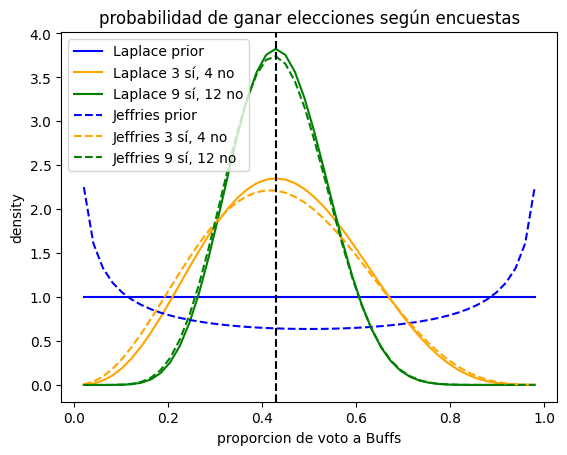

In [10]:
ys_0 = scipy.stats.beta.pdf(xs, 1, 1)
ys_1 = scipy.stats.beta.pdf(xs, 1 + a1, 1 + b1)
ys_2 = scipy.stats.beta.pdf(xs, 1 + a2, 1 + b2)

f, ax = plt.subplots(1)

ax.plot(xs, ys_0, label="Laplace prior", color="blue")
ax.plot(xs, ys_1, label="Laplace {0} sí, {1} no".format(a1, b1), color="orange")
ax.plot(xs, ys_2, label="Laplace {0} sí, {1} no".format(a2, b2), color="green")

jeffries = scipy.stats.beta.pdf(xs, 0.5, 0.5)
jeffries_3_4 = scipy.stats.beta.pdf(xs, 0.5 + a1, 0.5 + b1)
jeffries_9_12 = scipy.stats.beta.pdf(xs, 0.5 + a2, 0.5 + b2)

ax.plot(xs, jeffries, label="Jeffries prior", linestyle='--', color="blue")
ax.plot(xs, jeffries_3_4, label="Jeffries 3 sí, 4 no".format(a2, b2), linestyle='--', color="orange")
ax.plot(xs, jeffries_9_12, label="Jeffries 9 sí, 12 no".format(a2, b2), linestyle='--', color="green")

ax.set_title("probabilidad de ganar elecciones según encuestas")
ax.set_ylabel('density')
ax.set_xlabel('proporcion de voto a Buffs')

plt.axvline(x=3/(3 + 4), color='black', linestyle='--')

plt.legend(loc="upper left")
plt.show()

Como es intuitivo:
* los priors de Jeffries y de Laplace son bastante distintos, ergo las opiniones de los analistas sobre $p$ antes de ver datos son bastante distintas
* a medida que entran datos experimentales y aplican Bayes, las opiniones de los analistas van convergiendo
* después de observar 9 sí y 12 no las opiniones de los analistas sobre $p$ son muy parecidas, aunque han partido de priors bastante distintos

<span id='bayes-convenience'></id>
#### Bayes: conveniencia de representar las conclusiones como distribuciones probabilísticas

Las conclusiones sobre el parámetro $p$ vienen representadas como distribuciones probabilísticas quiere decir que podemos formular cualquier pregunta que tengamos en términos probabilísticos: esto es extremadamente potente.

Por ejemplo, supongamos que un amigo quiere hacer una apuesta: tendremos que pagarle 100 euros si los Buffs reciben más del 42% de los votos, y en otro caso él nos pagará 100 euros.

Después de recibir los datos de la encuesta telefónica de 9 a favor de los Buffs y 12 a favor de los Blues, ¿nos conviene aceptar la apuesta?

Nuestras creencias sobre $p$ son una distribución probabilística, así que podemos matematizar directamente la pregunta `Probabilidad p > 0.42`:

$$
\int_{0.42}^{1} Beta(\alpha=10, \beta=13, p)
$$

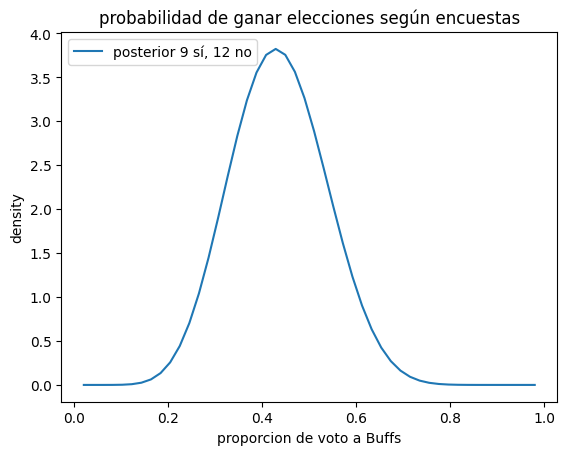

In [11]:

ys = scipy.stats.beta.pdf(xs, 1 + 9, 1 + 12)

f, ax = plt.subplots(1)

ax.plot(xs, ys_2, label="posterior 9 sí, 12 no")

ax.set_title("probabilidad de ganar elecciones según encuestas")
ax.set_ylabel('density')
ax.set_xlabel('proporcion de voto a Buffs')

plt.legend(loc="upper left")
plt.show()

<span id='confidence-level'></id>
### Frecuentistas: escoger nivel de confianza y método

Hay [varios métodos](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval) para calcular intervalos de confianza para proporciones binomiales; he escogido Wald por simplicidad de implementación, pero hay múltiples métodos que dan mejores resultados sobre todo para valores $p$ pequeños o grandes.

Hay que escoger el nivel de confianza adecuado para nuestra pregunta: queremos un nivel de confianza de 90%? 95%? 99%?

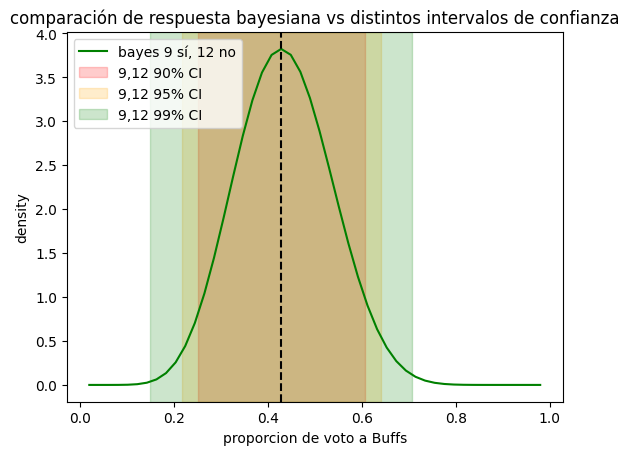

In [12]:
wald_9_12_90 = wald(9, 12, 0.90)
wald_9_12_95 = wald(9, 12, 0.95)
wald_9_12_99 = wald(9, 12, 0.99)

f, ax = plt.subplots(1)

ax.plot(xs, ys_2, label="bayes {0} sí, {1} no".format(a2, b2), color='green')

ax.set_title("comparación de respuesta bayesiana vs distintos intervalos de confianza")
ax.set_ylabel('density')
ax.set_xlabel('proporcion de voto a Buffs')

plt.axvline(x=3/(3 + 4), color='black', linestyle='--')

ax.axvspan(wald_9_12_90[0], wald_9_12_90[1], label='9,12 90% CI', alpha=0.2, color='red')
ax.axvspan(wald_9_12_95[0], wald_9_12_95[1], label='9,12 95% CI', alpha=0.2, color='orange')
ax.axvspan(wald_9_12_99[0], wald_9_12_99[1], label='9,12 99% CI', alpha=0.2, color='green')


plt.legend(loc="upper left")
plt.show()

Yo entiendo poco los métodos frecuentistas así que no tengo mucho que contribuir a estas preguntas.

<span id='ejercicio'></id>
### Ejercicio: ratio de conversión en una web

Una tienda online que vende champú para ungulados está experimentando con el diseño de su web: creen que el diseño existente, `classic`, es menos eficaz en generar ventas que un diseño nuevo que llaman `modern`.

Han montado un [A/B test]() y ya han llegado los primeros datos:

* `classic`: 13 conversiones en 115123 visitas
* `modern`: 3 conversiones en 19187 visitas

El grupo de ejecutivos que está a favor de implantar el diseño `modern` argumenta que la tasa de conversión del nuevo diseño es un **38%** más alta que la del diseño `classic` y que hay que cambiar el diseño inmediatamente ya que incrementaría la facturación mensual en un 38%, este es su argumento:

* `classic` conversion rate: $\frac{13}{115123} \cdot 100 = 0.0113 \%$
* `modern` conversion rate: $\frac{3}{19187} \cdot 100 = 0.0156 \%$
* $\frac{modern\_rate}{classic\_rate} = \frac{0.0156}{0.0113}= 1.38$

Hace poco que hemos tratado el problema de estimar la proporción de Blues y Buffs y hay algo en esta argumentación que no nos acaba de convencer.

<span id='ejercicio1'></id>
#### Ejercicio 1

Aplica la metodología bayesiana para estimar las distribuciones posteriores de las proporciones $modern\_rate$ y $classic\_rate$ y píntalas.

<span id='ejercicio2'></id>
#### Ejercicio 2

Aplica la metodología frecuentista para estimar intervalos de confianza para las proporciones $modern\_rate$ y $classic\_rate$.

Píntalas en un gráfico con los resultados bayesianos.

¿Es sensato usar la aproximación de Wald al intervalo de confianza en este caso? Usa/implementa otra aproximación para contrastar.

<span id='ejercicio3'></id>
#### Ejercicio 3

Supongamos que hay una media de 28780 visitas diarias. Usando el enfoque bayesiano, y teniendo en cuenta la sección [Bayes: conveniencia de representar las conclusiones como distribuciones probabilísticas](#bayes-convenience),

* ¿cuál es la probabilidad de conseguir menos de 2 visitas diarias con el diseño `classic`?
* ¿cuál es la probabilidad de conseguir menos de 2 visitas diarias con el diseño `modern`?
* ¿cuál es la probabilidad de conseguir más de 4 visitas diarias con el diseño `classic`?
* ¿cuál es la probabilidad de conseguir más de 4 visitas diarias con el diseño `modern`?

<span id='ejercicio4'></id>
#### Ejercicio 4

Supongamos que la tienda factura 1.78 euros por conversión.

La tienda quebrará si en un periodo de 30 días consecutivos factura menos de **TODO** euros.

* Qué probabilidad hay de que la tienda quiebre en los 30 días siguientes bajo el diseño `classic`?
* Qué probabilidad hay de que la tienda quiebre en los 30 días siguientes bajo el diseño `modern`?